# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data from CSV

In [4]:
# Puts data into a data frame that includes rows and columns 
salaries = pd.read_csv("SalaryData.csv")

# Looking at Data

In [5]:
# Printing the columns and data types 
salaries.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
# Printing the first 5 rows of data
salaries.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
# Giving summary stats for data in the table 
# If there is a significant differnece between median and mean there could be outliers 
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
# Giving summary stats for the table it self
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
# Counting the missing values (null values) in each column
salaries.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
# Displaying the rows that contain any null values
# Simply returns the boolean of if there is a null value
# Axis = 0 means columns, axis = 1 is rows
salaries.isnull().any(axis = 1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [13]:
# Actually displays the rows that have null values
salaries[salaries.isnull().any(axis = 1)]

,YearsExperience,Salary


# Visualizing the data

In [20]:
# Setting the color and the style of the plots
sns.set_palette("Blues_d")
sns.set_style("darkgrid")

/Users/nwenzel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

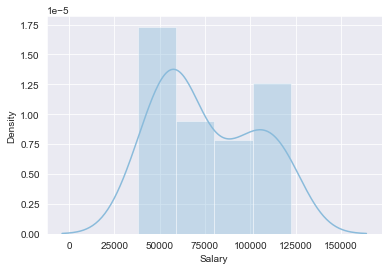

In [22]:
# Shows a distribution plot of the salary (dependent) variable
sns.distplot(salaries["Salary"])

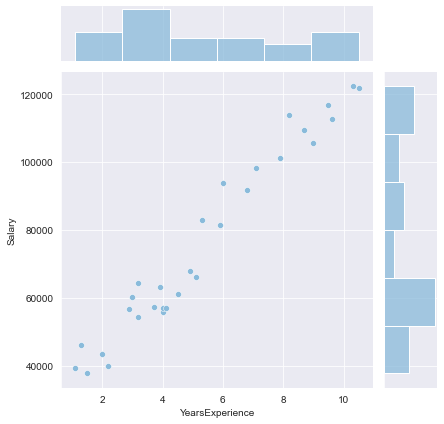

In [23]:
# Shows a scatter plot that demonstrates the relationship between years experience (independent) and salary(depdendent)
sns.jointplot(x = "YearsExperience", y = "Salary", data = salaries)

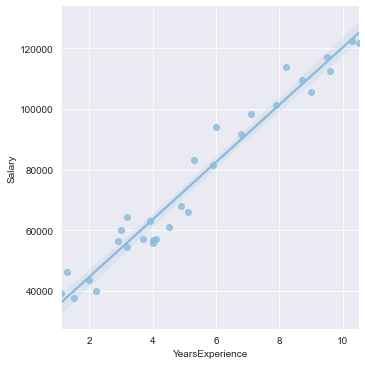

In [24]:
# Creating a scatter plot with a regression line in the data
sns.lmplot(x = "YearsExperience", y = "Salary", data = salaries)

# Setting the X and Y variables 

In [25]:
y = salaries['Salary']

In [26]:
# 2D Array of indendent variables
X = salaries[['YearsExperience']]

# Partitioning the Data

In [27]:
# Importing the splitting function from sklearn library
from sklearn.model_selection import train_test_split

In [28]:
# Splitting the data into training and testing data sets,
# Testing data includes 50% of datapoitns 
# Pseudo random, random state int will always split the same
# 0.5 split is unrealisitcally high for actual regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

In [29]:
print(X_train)
print(y_train)

    YearsExperience
1               1.3
18              5.9
14              4.5
19              6.0
21              7.1
2               1.5
20              6.8
10              3.9
16              5.1
15              4.9
23              8.2
7               3.2
3               2.0
24              8.7
8               3.2
1      46205.0
18     81363.0
14     61111.0
19     93940.0
21     98273.0
2      37731.0
20     91738.0
10     63218.0
16     66029.0
15     67938.0
23    113812.0
7      54445.0
3      43525.0
24    109431.0
8      64445.0
Name: Salary, dtype: float64


In [30]:
print(len(X_train))
print(len(y_train))

15
15


# Regression Analysis

In [31]:
# Importing the learning Regression tool
from sklearn.linear_model import LinearRegression

In [32]:
# Creating the linear regression object
LR = LinearRegression()

In [33]:
# Running linear regression on training data
LR.fit(X_train, y_train)

LinearRegression()

In [36]:
# Printing the y intercetp and slope coefficent for the regression line
print("Regression Intercept: " + str(LR.intercept_))
print("Regression Coefficients: " + str(LR.coef_))

Regression Intercept: 24768.139913461004
Regression Coefficients: [9981.76903593]


# Making Predictions on Data

In [37]:
LR_Pred_Train = LR.predict(X_train)

In [38]:
LR_Pred_Test = LR.predict(X_test)

In [39]:
# Prediction on set, both test and train
LR_Pred = LR.predict(X)

In [40]:
# Printing prediction of data, array of predicted Y (salary) values
print(LR_Pred)

[ 35748.08585299  37744.43966018  39740.79346736  44731.67798533
  46728.03179252  53715.27011767  54713.44702127  56709.80082845
  56709.80082845  61700.68534642  63697.03915361  64695.2160572
  64695.2160572   65693.39296079  69686.10057517  73678.80818954
  75675.16199673  77671.51580392  83660.57722548  84658.75412907
  92644.16935782  95638.7000686  103624.11529735 106618.64600813
 111609.53052609 114604.06123687 119594.94575484 120593.12265843
 127580.36098359 129576.71479078]


# Evaluation of Prediction


In [41]:
# Getting the R^2 values for the predictions. R^2 should be as close to one as possible for good fit
print("R^2 for training data: " + str(LR.score(X_train, y_train)))
print("R^2 for test data: " + str(LR.score(X_test, y_test)))

R^2 for training data: 0.9382035605624517
R^2 for test data: 0.9550943825202389


In [42]:
# Importing metrics tools
from sklearn import metrics

In [44]:
# Calculating MAE, MSE and RMSE values for the test data
MAE = metrics.mean_absolute_error(y_test, LR_Pred_Test)
MSE = metrics.mean_squared_error(y_test, LR_Pred_Test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, LR_Pred_Test))

In [45]:
print("MAE for test: " + str(MAE))
print("MSE for test: " + str(MSE))
print("RMSE for test: " + str(RMSE))

MAE for test: 5919.836276010059
MSE for test: 40271868.934256196
RMSE for test: 6346.012049646313


In [47]:
# Calculating the RMSE for the test and train sets
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, LR_Pred_Train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, LR_Pred_Test))
print("RMSE Training: " + str(RMSE_train))
print("RMSE Test: " + str(RMSE_test))

RMSE Training: 5758.921207457837
RMSE Test: 6346.012049646313


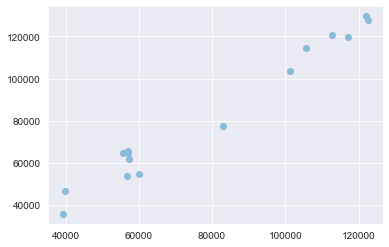

In [48]:
# Showing scatter plot of actual Y (salary) values and predicted Y values
plt.scatter(y_test, LR_Pred_Test)

/Users/nwenzel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

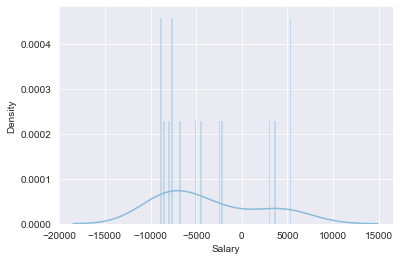

In [49]:
# Showing distribution of error term, should be normal distribution
sns.distplot((y_test-LR_Pred_Test), bins=50)